In [2]:
from copy import copy,deepcopy 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from Path import *
from CustomKnot import *
from KnotDatabase import *
from KnotStar import *
from random import *
from KnotGA import *
from KnotAnt import *
np.set_printoptions(threshold=np.inf,linewidth=np.inf,nanstr="n")
pd.options.display.max_colwidth = 100

In [2]:
knot_3_1_1 = CustomKnot([X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)])
knot_3_1_2 = CustomKnot([X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)])


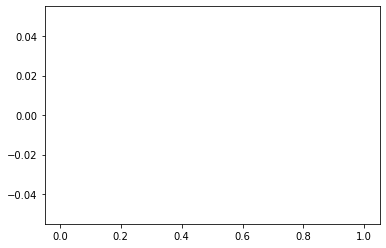

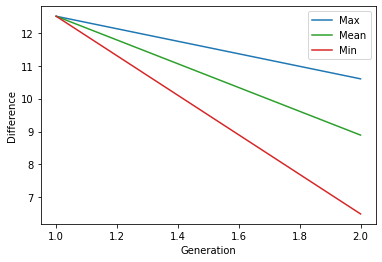

Generation:  2
100


(True, ['.createALoop(4,0)', '.reidemeisterIII(6,1,4,check=False)'])

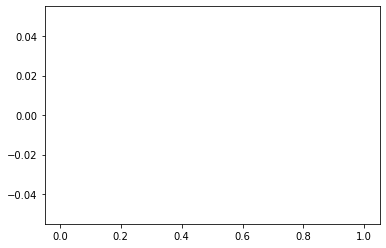

In [3]:
print("init Difference",difference(knot_3_1_1,knot_3_1_2))
areSameKnotAnt(knot_3_1_1,knot_3_1_2,generationLimit=100, debug=True,dynamicMMM=True,plotPheromones=True)
# print(are, movements)
# plotDifferences(differenceMMM)


In [2]:
#Tres proyecciones del nudo figura en 8 
k1 = CustomKnot([X(3,8,2,7),X(7,4,6,3),X(8,6,1,5),X(5,1,4,2)])
k2 = CustomKnot([X(6,8,5,1),X(7,2,8,3),X(3,6,4,7),X(2,4,1,5)])
k3 = CustomKnot([X(2,8,1,9),X(7,3,8,2),X(4,6,3,7),X(4,9,5,10),X(10,5,1,6)])

print("k1==k2",k1==k2)
print("k2==k3",k2==k3)
print("k1==k3",k1==k3)
start = time()
print("same k1,k2",areSameKnotAnt(k1,k2,100))
print("Time: ",time()-start)
start = time()
print("same k2,k3",areSameKnotAnt(k2,k3,100))
print("Time: ",time()-start)
start = time()
print("same k1,k3",areSameKnotAnt(k1,k3,100))
print("Time: ",time()-start)
start = time()
print("same k2,k1",areSameKnotAnt(k2,k1,100))
print("Time: ",time()-start)
start = time()
print("same k3,k2",areSameKnotAnt(k3,k2,100))
print("Time: ",time()-start)
start = time()
print("same k3,k1",areSameKnotAnt(k3,k1,100))
print("Time: ",time()-start)

k1==k2 True
k2==k3 False
k1==k3 False
same k1,k2 (True, [])
Time:  0.007225751876831055
same k2,k3 (True, ['.createALoop(7,3)', '.reidemeisterIII(9,3,7,check=False)'])
Time:  0.10347294807434082
same k1,k3 (True, ['.createALoop(7,2)', '.reidemeisterIII(7,3,9,check=False)'])
Time:  0.11577081680297852
same k2,k1 (True, [])
Time:  0.002482175827026367
same k3,k2 (True, ['.reidemeisterIII(4,10,6,check=False)', '.undoALoop(X(4,6,5,5))'])
Time:  0.12466597557067871
same k3,k1 (True, ['.reidemeisterIII(1,5,9,check=False)', '.undoALoop(X(1,9,10,10))'])
Time:  0.08450603485107422


In [3]:
#Tres proyecciones del nudo figura en 8 
k1 = CustomKnot([X(3,8,2,7),X(7,4,6,3),X(8,6,1,5),X(5,1,4,2)])
k2 = CustomKnot([X(6,8,5,1),X(7,2,8,3),X(3,6,4,7),X(2,4,1,5)])
k3 = CustomKnot([X(2,8,1,9),X(7,3,8,2),X(4,6,3,7),X(4,9,5,10),X(10,5,1,6)])

print("k1==k2",k1==k2)
print("k2==k3",k2==k3)
print("k1==k3",k1==k3)
start = time()
print("same k1,k2",areSameKnotAnt2(k1,k2,100))
print("Time: ",time()-start)
start = time()
print("same k2,k3",areSameKnotAnt2(k2,k3,100))
print("Time: ",time()-start)
start = time()
print("same k1,k3",areSameKnotAnt2(k1,k3,100))
print("Time: ",time()-start)
start = time()
print("same k2,k1",areSameKnotAnt2(k2,k1,100))
print("Time: ",time()-start)
start = time()
print("same k3,k2",areSameKnotAnt2(k3,k2,100))
print("Time: ",time()-start)
start = time()
print("same k3,k1",areSameKnotAnt2(k3,k1,100))
print("Time: ",time()-start)

k1==k2 True
k2==k3 False
k1==k3 False
same k1,k2 (True, [])
Time:  0.0031061172485351562
same k2,k3 (True, ['.createALoop(7,3)', '.reidemeisterIII(9,3,7,check=False)'])
Time:  2.4640069007873535
same k1,k3 (True, ['.createALoop(3,2)', '.reidemeisterIII(3,9,5,check=False)'])
Time:  2.233983039855957
same k2,k1 (True, [])
Time:  0.0023686885833740234
same k3,k2 (True, ['.reidemeisterIII(1,5,9,check=False)', '.undoALoop(X(1,9,10,10))'])
Time:  2.1136081218719482
same k3,k1 (True, ['.reidemeisterIII(4,10,6,check=False)', '.undoALoop(X(4,6,5,5))'])
Time:  1.989116907119751


In [6]:
db = pd.read_csv("databases/master.csv")
knots = []
db.reset_index()
for index, row in db.iterrows():
    if len(knots) >4: break
    nameRow = row["name"]
    
    if nameRow == '4_1':
        crosses = row["crosses"]
        knot = CustomKnot(crosses)
        if knot.numberOfStrands<=15:
            knots.append(knot)

knotsDict:dict[str,dict[str,tuple[CustomKnot,CustomKnot]]] = dict()
k=0
for i in range(len(knots)):
    k1 = knots[i]
    r1 = k1.representationForHash
    if r1 in knotsDict:
        continue
    knotsDict[r1] = dict()
    for j in range(i+1,len(knots)):
        k2 = knots[j]
        r2 = k2.representationForHash
        if r2 in knotsDict[r1]:
            continue
        k+=1
        knotsDict[r1][r2] = (deepcopy(k1),deepcopy(k2))

for d in knotsDict:
    di = knotsDict[d]
    for t in di:
        k1, k2 = di[t]
        print("-----")
        print("k1: ",k1.crosses)
        print("k2: ",k2.crosses)

-----
k1:  [X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
k2:  [X(1,7,2,6), X(3,8,4,1), X(5,3,6,2), X(7,4,8,5)]
-----
k1:  [X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
k2:  [X(1,6,12,5), X(2,10,3,9), X(6,1,7,2), X(7,5,8,4), X(10,4,11,3), X(11,8,12,9)]
-----
k1:  [X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
k2:  [X(1,5,2,4), X(3,8,4,9), X(6,14,7,13), X(9,2,10,3), X(10,7,11,8), X(11,14,12,1), X(12,6,13,5)]
-----
k1:  [X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
k2:  [X(1,5,12,6), X(2,9,3,10), X(6,2,7,1), X(7,4,8,5), X(10,3,11,4), X(11,9,12,8)]
-----
k1:  [X(1,7,2,6), X(3,8,4,1), X(5,3,6,2), X(7,4,8,5)]
k2:  [X(1,6,12,5), X(2,10,3,9), X(6,1,7,2), X(7,5,8,4), X(10,4,11,3), X(11,8,12,9)]
-----
k1:  [X(1,7,2,6), X(3,8,4,1), X(5,3,6,2), X(7,4,8,5)]
k2:  [X(1,5,2,4), X(3,8,4,9), X(6,14,7,13), X(9,2,10,3), X(10,7,11,8), X(11,14,12,1), X(12,6,13,5)]
-----
k1:  [X(1,7,2,6), X(3,8,4,1), X(5,3,6,2), X(7,4,8,5)]
k2:  [X(1,5,12,6),

In [5]:
timesDict:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict:
    di = knotsDict[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict:
                timesDict[k1.representationForHash] = dict()
            timesDict[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,7,2,6), X(3,8,4,1), X(5,3,6,2), X(7,4,8,5)]
(True, ['.reidemeisterIII(7,3,9,check=False)', '.undoALoop(X(7,9,8,8))'])
Time: 0.14849209785461426
(True, ['.createALoop(8,2)', '.reidemeisterIII(8,4,10,check=False)'])
Time: 0.11046695709228516
---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,6,12,5), X(2,10,3,9), X(6,1,7,2), X(7,5,8,4), X(10,4,11,3), X(11,8,12,9)]
(True, ['.reidemeisterIII(4,8,2,check=False)', '.createReidemeisterII(2,9,0)', '.undoALoop(X(5,5,6,4))', '.reidemeisterIII(4,7,11,check=False)'])
Time: 0.3487088680267334
(True, ['.reidemeisterIII(11,3,9,check=False)', '.undoALoop(X(10,9,11,10))'])
Time: 0.15502405166625977
---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,5,2,4), X(3,8,4,9), X(6,14,7,13), X(9,2,10,3), X(10,7,11,8), X(11,14,12,1), X(12,6,13,5)]
(False, [])
Time: 183.86265397071838
(True, ['.reidemeisterIII(12,1,5,check=False)', '.reidemeisterIII(11

In [10]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt2")
for d in timesDict:
    di = timesDict[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt2
0.15 s & 0.11 s \\
0.35 s & 0.16 s \\
183.86 s & 6.56 s \\
0.12 s & 0.15 s \\
0.11 s & 0.14 s \\
183.79 s & 0.39 s \\
0.11 s & 0.15 s \\
182.76 s & 0.67 s \\
20.56 s & 13.55 s \\
1.58 s & 182.35 s \\
ZeroPass:  0    ,onePass:  4    ,twoPass:  6
mean 2.802936777472496


In [7]:
timesDict2:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict:
    di = knotsDict[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt2(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt2(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict2:
                timesDict2[k1.representationForHash] = dict()
            timesDict2[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,7,2,6), X(3,8,4,1), X(5,3,6,2), X(7,4,8,5)]
(True, ['.reidemeisterIII(7,3,9,check=False)', '.undoALoop(X(7,9,8,8))'])
Time: 2.406583070755005
(True, ['.createALoop(4,2)', '.reidemeisterIII(4,10,6,check=False)'])
Time: 2.7021679878234863
---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,6,12,5), X(2,10,3,9), X(6,1,7,2), X(7,5,8,4), X(10,4,11,3), X(11,8,12,9)]
(True, ['.createALoop(5,1)', '.reidemeisterIII(5,1,7,check=False)'])
Time: 3.182573080062866
(True, ['.reidemeisterIII(11,3,9,check=False)', '.undoALoop(X(10,9,11,10))'])
Time: 4.0781331062316895
---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,5,2,4), X(3,8,4,9), X(6,14,7,13), X(9,2,10,3), X(10,7,11,8), X(11,14,12,1), X(12,6,13,5)]
(True, ['.createReidemeisterII(2,8,0)', '.reidemeisterIII(6,2,12,check=False)', '.createALoop(9,0)', '.undoALoop(X(10,9,11,10))', '.reidemeisterIII(6,2,12,check=False)', '.reidemeisterIII

In [11]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt")
for d in timesDict2:
    di = timesDict2[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt
2.41 s & 2.70 s \\
3.18 s & 4.08 s \\
58.27 s & 12.93 s \\
6.45 s & 3.86 s \\
3.01 s & 3.98 s \\
41.40 s & 7.29 s \\
2.97 s & 3.88 s \\
18.66 s & 5.34 s \\
8.74 s & 24.70 s \\
33.45 s & 83.01 s \\
ZeroPass:  0    ,onePass:  0    ,twoPass:  10
mean 16.51548056602478


In [4]:
k1 = CustomKnot([X(3,8,2,7),X(7,4,6,3),X(8,6,1,5),X(5,1,4,2)])
k2 = CustomKnot([X(6,8,5,1),X(7,2,8,3),X(3,6,4,7),X(2,4,1,5)])
k3 = CustomKnot([X(2,8,1,9),X(7,3,8,2),X(4,6,3,7),X(4,9,5,10),X(10,5,1,6)])

print("k1==k2",k1==k2)
print("k2==k3",k2==k3)
print("k1==k3",k1==k3)
start = time()
print("same k1,k2",areSameKnotAnt3(k1,k2,100))
print("Time: ",time()-start)
start = time()
print("same k2,k3",areSameKnotAnt3(k2,k3,100))
print("Time: ",time()-start)
start = time()
print("same k1,k3",areSameKnotAnt3(k1,k3,100))
print("Time: ",time()-start)
start = time()
print("same k2,k1",areSameKnotAnt3(k2,k1,100))
print("Time: ",time()-start)
start = time()
print("same k3,k2",areSameKnotAnt3(k3,k2,100))
print("Time: ",time()-start)
start = time()
print("same k3,k1",areSameKnotAnt3(k3,k1,100))
print("Time: ",time()-start)

k1==k2 True
k2==k3 False
k1==k3 False
same k1,k2 (True, [], [])
Time:  0.006896257400512695
same k2,k3 (True, ['.createALoop(7,3)'], ['.reidemeisterIII(1,5,9,check=False)'])
Time:  0.7156107425689697
same k1,k3 (True, ['.createALoop(3,2)'], ['.reidemeisterIII(1,5,9,check=False)'])
Time:  0.6799979209899902
same k2,k1 (True, [], [])
Time:  0.041597843170166016
same k3,k2 (True, ['.reidemeisterIII(4,10,6,check=False)'], ['.createALoop(3,3)'])
Time:  0.09838628768920898
same k3,k1 (True, ['.reidemeisterIII(1,5,9,check=False)'], ['.createALoop(3,2)'])
Time:  0.06426119804382324


In [8]:
timesDict3:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict:
    di = knotsDict[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt3(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt3(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict3:
                timesDict3[k1.representationForHash] = dict()
            timesDict3[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,7,2,6), X(3,8,4,1), X(5,3,6,2), X(7,4,8,5)]
(True, ['.reidemeisterIII(4,8,2,check=False)'], ['.createALoop(4,2)'])
Time: 0.08655905723571777
(True, ['.createALoop(8,2)'], ['.reidemeisterIII(7,3,9,check=False)'])
Time: 0.7826449871063232
---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,6,12,5), X(2,10,3,9), X(6,1,7,2), X(7,5,8,4), X(10,4,11,3), X(11,8,12,9)]
(True, ['.reidemeisterIII(4,8,2,check=False)', '.undoALoop(X(3,3,4,2))'], ['.reidemeisterIII(12,8,5,check=False)', '.undoReidemeisterII(11,4)'])
Time: 2.181912899017334
(True, ['.reidemeisterIII(11,3,9,check=False)'], ['.createALoop(6,0)'])
Time: 0.41677331924438477
---
[X(1,5,10,6), X(3,8,4,9), X(4,2,5,1), X(6,10,7,9), X(7,2,8,3)]
[X(1,5,2,4), X(3,8,4,9), X(6,14,7,13), X(9,2,10,3), X(10,7,11,8), X(11,14,12,1), X(12,6,13,5)]
(True, ['.createALoop(10,3)', '.undoALoop(X(11,11,12,10))', '.reidemeisterIII(7,3,9,check=False)', '.createALoop(6,0

In [9]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt")
for d in timesDict3:
    di = timesDict3[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt
0.09 s & 0.78 s \\
2.18 s & 0.42 s \\
5.74 s & 2.47 s \\
1.07 s & 3.05 s \\
0.17 s & 0.14 s \\
4.23 s & 0.52 s \\
0.23 s & 0.23 s \\
0.45 s & 4.69 s \\
11.79 s & 11.71 s \\
8.46 s & 31.46 s \\
ZeroPass:  0    ,onePass:  0    ,twoPass:  10
mean 4.494026911258698


In [6]:
db = pd.read_csv("databases/master.csv")
knots = []
db.reset_index()
for index, row in db.iterrows():
    if len(knots) >4: break
    nameRow = row["name"]
    
    if nameRow == '6_1':
        crosses = row["crosses"]
        knot = CustomKnot(crosses)
        if knot.numberOfStrands<=16:
            knots.append(knot)

knotsDict5_1:dict[str,dict[str,tuple[CustomKnot,CustomKnot]]] = dict()
k=0
for i in range(len(knots)):
    k1 = knots[i]
    r1 = k1.representationForHash
    if r1 in knotsDict5_1:
        continue
    knotsDict5_1[r1] = dict()
    for j in range(i+1,len(knots)):
        k2 = knots[j]
        r2 = k2.representationForHash
        if r2 in knotsDict5_1[r1]:
            continue
        k+=1
        knotsDict5_1[r1][r2] = (deepcopy(k1),deepcopy(k2))

for d in knotsDict5_1:
    di = knotsDict5_1[d]
    for t in di:
        k1, k2 = di[t]
        print("-----")
        print("k1: ",k1.crosses)
        print("k2: ",k2.crosses)

-----
k1:  [X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
k2:  [X(1,8,2,9), X(2,5,3,6), X(3,12,4,13), X(6,13,7,14), X(9,14,10,1), X(10,7,11,8), X(11,4,12,5)]
-----
k1:  [X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
k2:  [X(1,8,2,9), X(3,6,4,7), X(4,11,5,12), X(7,12,8,1), X(9,2,10,3), X(10,5,11,6)]
-----
k1:  [X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
k2:  [X(1,6,2,7), X(3,8,4,9), X(5,10,6,1), X(7,2,8,3), X(9,4,10,5)]
-----
k1:  [X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
k2:  [X(1,6,2,7), X(3,14,4,15), X(5,10,6,11), X(7,16,8,1), X(8,12,9,11), X(9,4,10,5), X(13,2,14,3), X(15,12,16,13)]
-----
k1:  [X(1,8,2,9), X(2,5,3,6), X(3,12,4,13), X(6,13,7,14), X(9,14,10,1), X(10,7,11,8), X(11,4,12,5)]
k2:  [X(1,8,2,9), X(3,6,4,7), X(4,11,5,12), X(7,12,8,1), X(9,2,10,3), X(10,5,11,6)]
-----
k1:  [X(1,8,2,9), X(2,5,3,6), X(3,12,4,13), X(6,13,7,14), X(9,14,10,1), X(10

In [8]:
timesDict5_1:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict5_1:
    di = knotsDict5_1[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict5_1:
                timesDict5_1[k1.representationForHash] = dict()
            timesDict5_1[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
[X(1,8,2,9), X(2,5,3,6), X(3,12,4,13), X(6,13,7,14), X(9,14,10,1), X(10,7,11,8), X(11,4,12,5)]
(True, ['.reidemeisterIII(2,9,6,check=False)', '.reidemeisterIII(8,1,6,check=False)', '.reidemeisterIII(8,1,6,check=False)', '.createReidemeisterII(1,6,0)', '.reidemeisterIII(12,7,16,check=False)', '.undoReidemeisterII(10,3)', '.reidemeisterIII(8,5,12,check=False)', '.createALoop(3,1)', '.reidemeisterIII(3,12,5,check=False)'])
Time: 1.7210259437561035
(True, ['.reidemeisterIII(10,1,8,check=False)', '.reidemeisterIII(11,2,5,check=False)', '.undoALoop(X(9,8,10,9))'])
Time: 0.37311410903930664
---
[X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
[X(1,8,2,9), X(3,6,4,7), X(4,11,5,12), X(7,12,8,1), X(9,2,10,3), X(10,5,11,6)]
(True, ['.reidemeisterIII(10,3,6,check=False)'])
Time: 0.12208080291748047
(True, ['.reidemeisterIII(10,3,6,check=False)'])
Time: 0.136368989944458
---
[X(1,8,2,9),

In [15]:
timesDict5_1_2:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict5_1:
    di = knotsDict5_1[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt2(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt2(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict5_1_2:
                timesDict5_1_2[k1.representationForHash] = dict()
            timesDict5_1_2[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
[X(1,8,2,9), X(2,5,3,6), X(3,12,4,13), X(6,13,7,14), X(9,14,10,1), X(10,7,11,8), X(11,4,12,5)]


KeyboardInterrupt: 

In [ ]:
timesDict5_1_3:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict5_1:
    di = knotsDict5_1[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt3(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt3(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict5_1_3:
                timesDict5_1_3[k1.representationForHash] = dict()
            timesDict5_1_3[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,8,2,9), X(2,5,3,6), X(4,11,5,12), X(7,12,8,1), X(9,6,10,7), X(10,3,11,4)]
[X(1,8,2,9), X(2,5,3,6), X(3,12,4,13), X(6,13,7,14), X(9,14,10,1), X(10,7,11,8), X(11,4,12,5)]
(True, ['.reidemeisterIII(10,3,6,check=False)', '.reidemeisterIII(10,3,6,check=False)', '.createReidemeisterII(2,12,0)', '.createALoop(9,1)', '.createReidemeisterII(3,9,0)', '.createReidemeisterII(9,19,0)', '.undoReidemeisterII(9,23)', '.undoALoop(X(13,14,14,15))', '.reidemeisterIII(2,14,20,check=False)', '.createReidemeisterII(6,10,0)', '.undoReidemeisterII(16,4)', '.reidemeisterIII(2,14,20,check=False)', '.undoReidemeisterII(3,19)', '.undoReidemeisterII(3,9)', '.reidemeisterIII(10,3,6,check=False)', '.reidemeisterIII(4,11,6,check=False)'], ['.reidemeisterIII(3,12,5,check=False)', '.reidemeisterIII(10,7,14,check=False)', '.reidemeisterIII(10,7,14,check=False)', '.reidemeisterIII(2,11,8,check=False)', '.createReidemeisterII(4,7,1)', '.reidemeisterIII(4,6,10,check=False)', '.reidemeisterIII(2,15,12,check=False)'

In [14]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt")
for d in timesDict5_1:
    di = timesDict5_1[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt
1.72 s & 0.37 s \\
0.12 s & 0.14 s \\
0.29 s & 1.51 s \\
183.92 s & 0.82 s \\
0.22 s & 0.57 s \\
1.15 s & 182.92 s \\
181.53 s & 180.12 s \\
0.12 s & 0.15 s \\
185.21 s & 0.54 s \\
182.68 s & 7.14 s \\
ZeroPass:  1    ,onePass:  4    ,twoPass:  5
mean 1.0608662537166051


In [ ]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt2")
for d in timesDict5_1_2:
    di = timesDict5_1_2[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt2
12.78 s & 7.80 s \\
1.45 s & 1.65 s \\
5.52 s & 5.49 s \\
180.37 s & 12.48 s \\
4.23 s & 3.69 s \\
9.82 s & 25.31 s \\
150.04 s & 55.03 s \\
3.39 s & 2.72 s \\
13.84 s & 9.12 s \\
138.00 s & 20.43 s \\
ZeroPass:  0    ,onePass:  1    ,twoPass:  9
mean 25.409175094805267


In [ ]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt3")
for d in timesDict5_1_3:
    di = timesDict5_1_3[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt3
45.86 s & 8.64 s \\
20.13 s & 30.28 s \\
3.67 s & 8.43 s \\
1.91 s & 1.67 s \\
0.23 s & 2.98 s \\
2.44 s & 2.16 s \\
75.24 s & 46.95 s \\
0.24 s & 0.06 s \\
23.82 s & 28.33 s \\
10.90 s & 6.54 s \\
ZeroPass:  0    ,onePass:  0    ,twoPass:  10
mean 16.02409235239029


In [23]:
db = pd.read_csv("databases/master.csv")
knots = []
db.reset_index()
for index, row in db.iterrows():
    if len(knots) >4: break
    nameRow = row["name"]
    
    if nameRow == '6_1':
        crosses = row["crosses"]
        knot = CustomKnot(crosses)
        if knot.numberOfStrands<=20:
            knots.append(knot)

knotsDict6_1:dict[str,dict[str,tuple[CustomKnot,CustomKnot]]] = dict()
k=0
for i in range(len(knots)):
    k1 = knots[i]
    r1 = k1.representationForHash
    if r1 in knotsDict6_1:
        continue
    knotsDict6_1[r1] = dict()
    for j in range(i+1,len(knots)):
        k2 = knots[j]
        r2 = k2.representationForHash
        if r2 in knotsDict6_1[r1]:
            continue
        k+=1
        knotsDict6_1[r1][r2] = (deepcopy(k1),deepcopy(k2))

for d in knotsDict6_1:
    di = knotsDict6_1[d]
    for t in di:
        k1, k2 = di[t]
        print("-----")
        print("k1: ",k1.crosses)
        print("k2: ",k2.crosses)

-----
k1:  [X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
k2:  [X(1,6,2,7), X(4,12,5,11), X(5,2,6,3), X(7,14,8,1), X(9,12,10,13), X(10,4,11,3), X(13,8,14,9)]
-----
k1:  [X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
k2:  [X(1,3,14,4), X(2,9,3,10), X(5,13,6,12), X(7,4,8,5), X(10,1,11,2), X(11,7,12,6), X(13,8,14,9)]
-----
k1:  [X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
k2:  [X(1,8,16,7), X(1,15,2,14), X(4,12,5,11), X(5,2,6,3), X(6,15,7,16), X(9,12,10,13), X(10,4,11,3), X(13,8,14,9)]
-----
k1:  [X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
k2:  [X(2,10,3,9), X(5,14,6,1), X(7,12,8,13), X(8,4,9,3), X(10,2,11,1), X(11,4,12,5), X(13,6,14,7)]
-----
k1:  [X(1,6,2,7), X(4,12,5,11), X(5,2,6,3), X(7,14,8,1), X(9,12,10,13), X(10,4,11,3), X(13,8,14,9)]
k2:  [X(1,3,14,4), X(2,9,3,10), X(5,13,6,12), X(7,4,8,

In [24]:
timesDict6_1:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict6_1:
    di = knotsDict6_1[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict6_1:
                timesDict6_1[k1.representationForHash] = dict()
            timesDict6_1[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
[X(1,6,2,7), X(4,12,5,11), X(5,2,6,3), X(7,14,8,1), X(9,12,10,13), X(10,4,11,3), X(13,8,14,9)]
(True, ['.reidemeisterIII(1,9,13,check=False)', '.createALoop(14,1)', '.reidemeisterIII(1,9,13,check=False)', '.reidemeisterIII(8,2,13,check=False)', '.undoALoop(X(14,15,15,16))', '.reidemeisterIII(8,2,13,check=False)', '.reidemeisterIII(1,9,13,check=False)', '.createReidemeisterII(4,11,0)', '.undoReidemeisterII(14,5)', '.undoALoop(X(1,13,14,14))', '.createALoop(9,0)', '.undoALoop(X(10,9,11,10))', '.createALoop(5,0)', '.reidemeisterIII(7,13,5,check=False)'])
Time: 5.103162050247192
(True, ['.createALoop(9,0)', '.reidemeisterIII(5,13,3,check=False)', '.undoALoop(X(10,9,11,10))', '.undoALoop(X(4,3,5,4))', '.createALoop(10,3)', '.createReidemeisterII(4,9,0)', '.createReidemeisterII(2,6,0)', '.undoReidemeisterII(2,10)', '.undoALoop(X(15,15,16,14))', '.createALoop(4,2)', '.undoReidemeisterII(14,7)', 

In [25]:
timesDict6_1_2:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict6_1:
    di = knotsDict6_1[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt2(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt2(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict6_1_2:
                timesDict6_1_2[k1.representationForHash] = dict()
            timesDict6_1_2[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
[X(1,6,2,7), X(4,12,5,11), X(5,2,6,3), X(7,14,8,1), X(9,12,10,13), X(10,4,11,3), X(13,8,14,9)]
(True, ['.reidemeisterIII(1,9,13,check=False)', '.createReidemeisterII(3,7,0)', '.createALoop(10,0)', '.undoReidemeisterII(5,9)', '.undoALoop(X(1,15,16,16))', '.undoALoop(X(7,6,8,7))', '.createALoop(12,3)', '.undoALoop(X(13,13,14,12))', '.createALoop(5,0)', '.reidemeisterIII(7,13,5,check=False)'])
Time: 23.270999670028687
(True, ['.reidemeisterIII(5,11,3,check=False)', '.createALoop(13,3)', '.reidemeisterIII(15,9,13,check=False)', '.undoALoop(X(4,3,5,4))'])
Time: 9.324301958084106
---
[X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
[X(1,3,14,4), X(2,9,3,10), X(5,13,6,12), X(7,4,8,5), X(10,1,11,2), X(11,7,12,6), X(13,8,14,9)]
(True, ['.reidemeisterIII(8,2,13,check=False)', '.reidemeisterIII(3,7,13,check=False)', '.reidemeisterIII(6,14,10,check=False)

In [26]:
timesDict6_1_3:dict[str,dict[str,tuple[float,float]]] = dict()
for d in knotsDict6_1:
    di = knotsDict6_1[d]

    for t in di:
        k1, k2 = di[t]
        if k1!= k2:
            print("---")
            print(k1.crosses)
            print(k2.crosses)
            start = time()
            print(areSameKnotAnt3(k1,k2,timeLimit=180))
            t1 = time()-start
            print("Time:",t1)
            start = time()
            print(areSameKnotAnt3(k2,k1,timeLimit=180))
            t2 = time()-start
            print("Time:",t2)
            if not k1.representationForHash in timesDict6_1_3:
                timesDict6_1_3[k1.representationForHash] = dict()
            timesDict6_1_3[k1.representationForHash][k2.representationForHash]= (t1,t2)

---
[X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
[X(1,6,2,7), X(4,12,5,11), X(5,2,6,3), X(7,14,8,1), X(9,12,10,13), X(10,4,11,3), X(13,8,14,9)]
(True, ['.reidemeisterIII(1,9,13,check=False)', '.undoALoop(X(1,13,14,14))'], ['.reidemeisterIII(10,4,12,check=False)', '.undoALoop(X(10,11,11,12))'])
Time: 14.352242231369019
(True, ['.reidemeisterIII(10,4,12,check=False)', '.undoALoop(X(10,11,11,12))'], ['.reidemeisterIII(1,9,13,check=False)', '.undoALoop(X(1,13,14,14))'])
Time: 15.548841953277588
---
[X(1,10,14,9), X(1,13,2,12), X(3,6,4,7), X(5,11,6,10), X(7,2,8,3), X(8,13,9,14), X(11,5,12,4)]
[X(1,3,14,4), X(2,9,3,10), X(5,13,6,12), X(7,4,8,5), X(10,1,11,2), X(11,7,12,6), X(13,8,14,9)]
(True, ['.createALoop(7,0)', '.undoALoop(X(8,7,9,8))', '.createALoop(4,0)', '.createReidemeisterII(2,5,0)', '.createALoop(10,3)', '.reidemeisterIII(9,7,3,check=False)', '.undoALoop(X(11,11,12,10))', '.undoALoop(X(8,7,9,8))', '.undoReidemeisterII(7,3)', '.reide

In [27]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt")
for d in timesDict6_1:
    di = timesDict6_1[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt
5.10 s & 22.65 s \\
3.15 s & 0.61 s \\
183.50 s & 181.59 s \\
0.41 s & 0.52 s \\
88.91 s & 31.72 s \\
0.32 s & 0.35 s \\
69.07 s & 23.62 s \\
184.75 s & 1.47 s \\
0.23 s & 0.21 s \\
57.23 s & 180.27 s \\
ZeroPass:  1    ,onePass:  2    ,twoPass:  7
mean 19.0982735902071


In [28]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt2")
for d in timesDict6_1_2:
    di = timesDict6_1_2[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt2
23.27 s & 9.32 s \\
7.43 s & 7.69 s \\
49.12 s & 18.65 s \\
4.89 s & 5.07 s \\
28.78 s & 17.22 s \\
5.04 s & 6.31 s \\
22.18 s & 36.75 s \\
34.43 s & 10.68 s \\
2.02 s & 2.10 s \\
14.14 s & 66.15 s \\
ZeroPass:  0    ,onePass:  0    ,twoPass:  10
mean 18.56231255531311


In [29]:
zeroPass = 0
onePass = 0
twoPass = 0
times = []
resolved = []
print("Result of areSameKnotAnt3")
for d in timesDict6_1_3:
    di = timesDict6_1_3[d]
    for t in di:
        t1, t2 = di[t]
        if t1>180 and t2>180:
            zeroPass+=1
        elif t1<180 and t2<180:
            twoPass+=1
        else:
            onePass+=1
        if t1<=180:
            times.append(t1)
            resolved.append((d,t,1))
        if t2<=180:
            times.append(t2)
            resolved.append((d,t,2))
        print("{:3.2f} s & {:3.2f} s \\\\".format(t1,t2))
print("ZeroPass: ",zeroPass,"   ,onePass: ",onePass, "   ,twoPass: ",twoPass)
print("mean",mean(times))

Result of areSameKnotAnt3
14.35 s & 15.55 s \\
41.95 s & 117.73 s \\
18.17 s & 8.69 s \\
10.21 s & 9.97 s \\
68.16 s & 119.10 s \\
1.08 s & 0.71 s \\
35.94 s & 18.90 s \\
20.20 s & 23.72 s \\
29.76 s & 54.47 s \\
6.69 s & 6.49 s \\
ZeroPass:  0    ,onePass:  0    ,twoPass:  10
mean 31.092000555992126
